Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Test/")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',seed=123,subset='training',validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',seed=123,subset='validation',validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

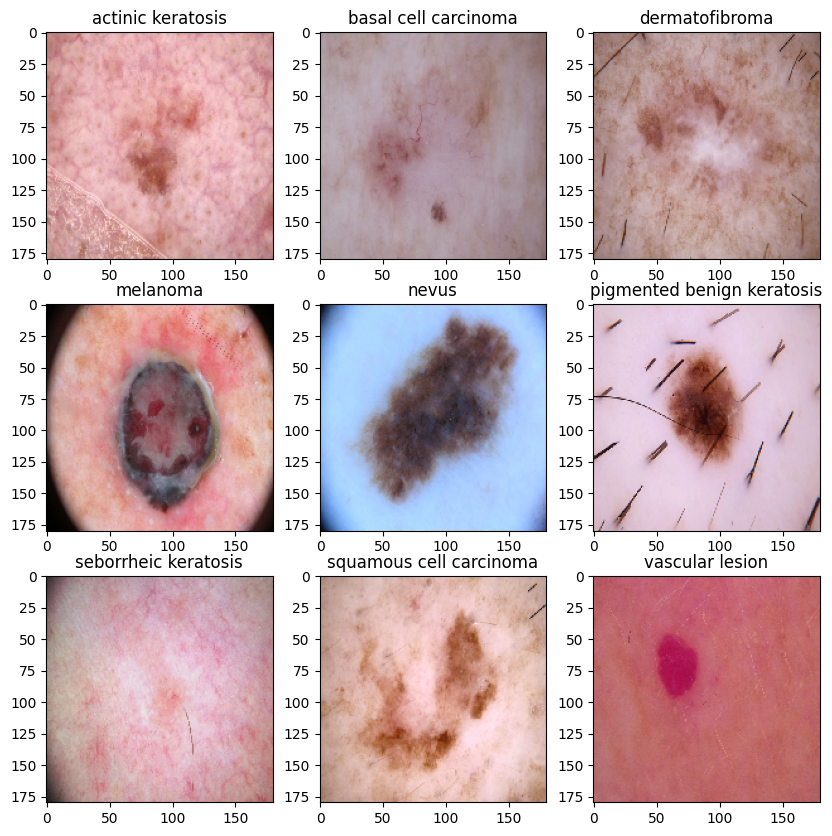

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
#Importing the keras library for loading images
from tensorflow.keras.preprocessing.image import load_img

# we will now create a dictionary to store the path of images as per the class and then use a loop to print the first image in each class
#Create an empty dictionary
image_path_dict = {}
for cn in class_names:
  image_path_dict[cn] = list(map(lambda x: str(data_dir_train)+'/'+cn+'/'+x, os.listdir(str(data_dir_train)+'/'+cn)))

#Visualize the images using the path
plt.figure(figsize = (10,10))
index = 0
for cn in class_names:
  image_list = image_path_dict[cn][:1]
  index+=1
  plt.subplot(3,3,index)
  plt.imshow(load_img(image_list[0],target_size=(img_height,img_width)))
  plt.title(cn)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
#Define input shape to go in the model
input_shape = (img_height,img_width,3) ##3 indicates R,G,B
model=Sequential() # This allows model creation layer by layer

#adding first layer along with preprocessing as per the given instruction
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))

#adding second layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#adding third layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))


#Flatten and dense layer
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) # fully connected

#Add softmax function as this is classification
model.add(layers.Dense(len(class_names),activation = 'softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 128)      0         
 2D)                                                    

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 488s 2s/step - loss: 2.9988 - accuracy: 0.2321 - val_loss: 1.8298 - val_accuracy: 0.3154
Epoch 2/20
56/56 [==============================] - 6s 108ms/step - loss: 1.8711 - accuracy: 0.3276 - val_loss: 1.9370 - val_accuracy: 0.3244
Epoch 3/20
56/56 [==============================] - 6s 103ms/step - loss: 1.6697 - accuracy: 0.4169 - val_loss: 1.5573 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - 6s 104ms/step - loss: 1.5191 - accuracy: 0.4816 - val_loss: 1.6440 - val_accuracy: 0.4228
Epoch 5/20
56/56 [==============================] - 6s 107ms/step - loss: 1.3418 - accuracy: 0.5324 - val_loss: 1.7674 - val_accuracy: 0.4004
Epoch 6/20
56/56 [==============================] - 6s 102ms/step - loss: 1.2403 - accuracy: 0.5558 - val_loss: 1.7142 - val_accuracy: 0.4251
Epoch 7/20
56/56 [==============================] - 6s 101ms/step - loss: 0.9785 - accuracy: 0.6574 - val_loss: 1.8127 - val_accuracy: 0.4810
Epoch 8

### Visualizing training results

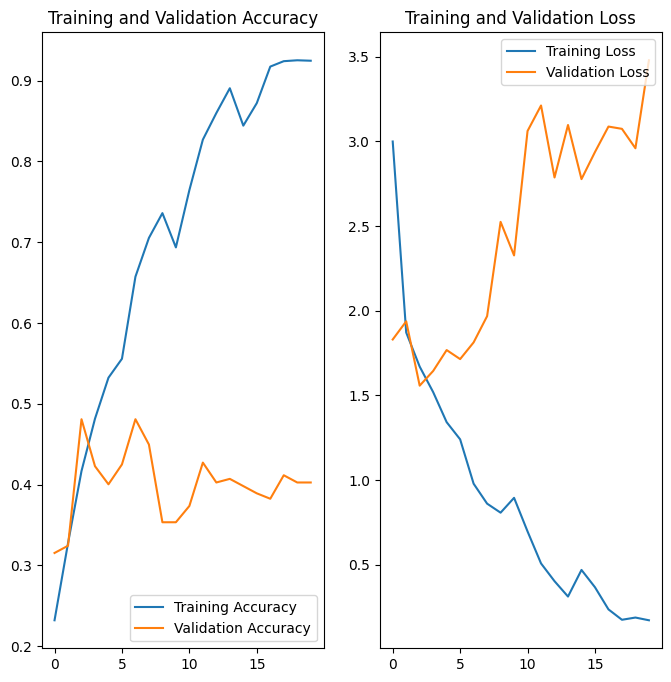

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This model is clearly overfit.

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
#In CNN, Data Augmentation can be done using multiple techniques like flipping, rotation, translation and zooming and colour transformation. In this scenario, we will not use the colour transformation.

data_augmentation = tf.keras.Sequential([
    #Random zoom each image during training
    layers.experimental.preprocessing.RandomZoom(0.3),
    #Random flip each image in horizontal and vertical direction
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    #Randomly rotate each image
    layers.experimental.preprocessing.RandomRotation(0.2),
    #Randomly translate each image
    layers.experimental.preprocessing.RandomTranslation(0.1,0.1)
])





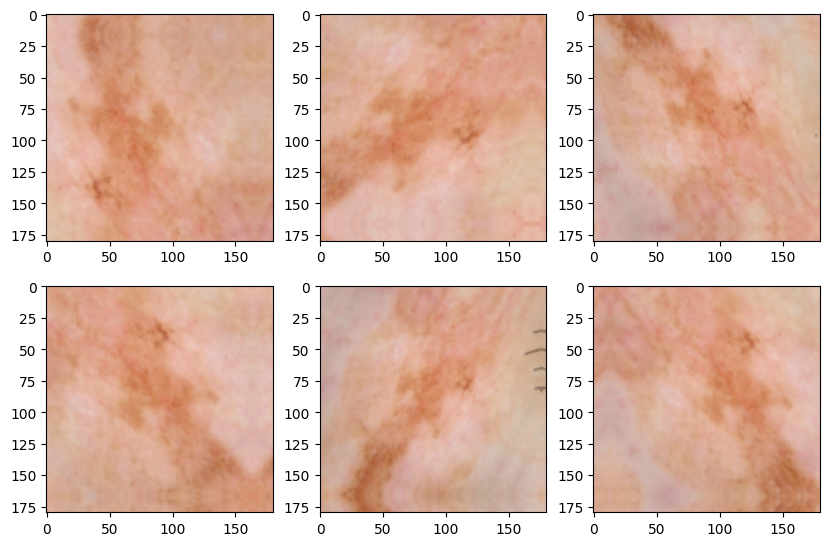

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
  for i in range(6):
    new_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(new_images[0].numpy().astype("uint8"))


### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# Creating model2 with Dropouts, as the current model is overfitting.
model2 = Sequential()
model2.add(data_augmentation)

#First Convulation Layer
model2.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2))) #Adding Maxpooling in first layer as well to check the results and see whether it improves accuracy

#Second Convulation Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout with 20% of the input units to be dropped
model2.add(layers.Dropout(0.20))

#Third Convulation Layer
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten and dense layer
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu')) # fully connected

#Droput with 25% of input units to be dropped
model2.add(layers.Dropout(0.25))

#Add softmax function as this is classification
model2.add(layers.Dense(len(class_names),activation = 'softmax'))




### Compiling the model

In [ ]:
## Your code goes here
model2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs

history=model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)


Epoch 1/20
56/56 [==============================] - 7s 65ms/step - loss: 2.3311 - accuracy: 0.2299 - val_loss: 1.8996 - val_accuracy: 0.2908
Epoch 2/20
56/56 [==============================] - 3s 62ms/step - loss: 1.9082 - accuracy: 0.2740 - val_loss: 1.8588 - val_accuracy: 0.3087
Epoch 3/20
56/56 [==============================] - 3s 62ms/step - loss: 1.8094 - accuracy: 0.3259 - val_loss: 1.8090 - val_accuracy: 0.3132
Epoch 4/20
56/56 [==============================] - 3s 58ms/step - loss: 1.6839 - accuracy: 0.3756 - val_loss: 1.6698 - val_accuracy: 0.4251
Epoch 5/20
56/56 [==============================] - 3s 60ms/step - loss: 1.6191 - accuracy: 0.4141 - val_loss: 1.6853 - val_accuracy: 0.3848
Epoch 6/20
56/56 [==============================] - 4s 64ms/step - loss: 1.5920 - accuracy: 0.4314 - val_loss: 1.5408 - val_accuracy: 0.4743
Epoch 7/20
56/56 [==============================] - 3s 60ms/step - loss: 1.5318 - accuracy: 0.4414 - val_loss: 1.4460 - val_accuracy: 0.4922
Epoch 8/20
56

### Visualizing the results

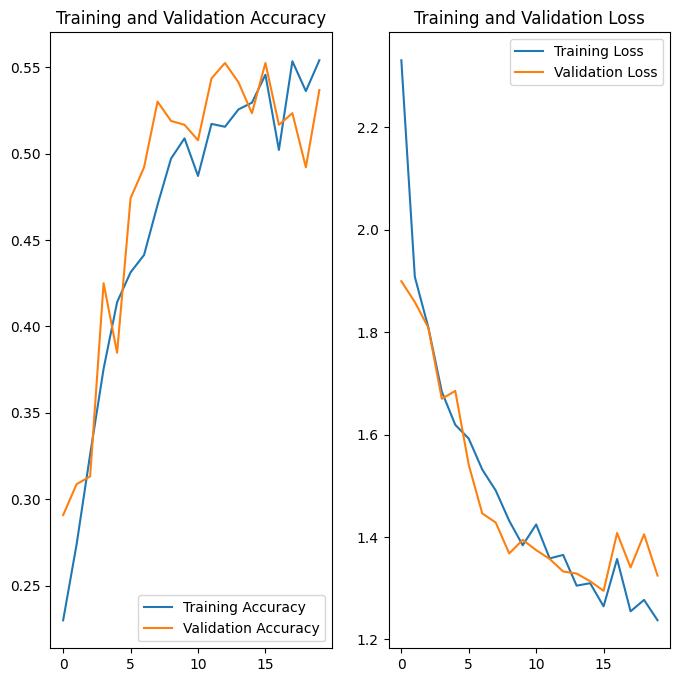

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The overfit issue is reduced, however, accuracy has not improved.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
num_images = []
for path in pathlib.Path(data_dir_train).iterdir():
  if path.is_dir():
            num_images.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

#name of the classes
class_name = [name for name in os.listdir(data_dir_train)
                    if os.path.isdir(os.path.join(data_dir_train, name))]

df = pd.DataFrame(list(zip(class_name,num_images)),columns =['Class_Name', 'No. of Images'])
df


,Class_Name,No. of Images
0,nevus,357
1,basal cell carcinoma,376
2,squamous cell carcinoma,181
3,melanoma,438
4,actinic keratosis,114
5,seborrheic keratosis,77
6,dermatofibroma,95
7,pigmented benign keratosis,462
8,vascular lesion,139


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
Seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E227A597FD0>: 100%|██████████| 500/500 [00:21<00:00, 23.57 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E22DFF13460>: 100%|██████████| 500/500 [00:22<00:00, 22.59 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E227A41EBC0>: 100%|██████████| 500/500 [00:22<00:00, 22.15 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7E227A616080>: 100%|██████████| 500/500 [01:26<00:00,  5.77 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2012x1956 at 0x7E22A4B8CD00>: 100%|██████████| 500/500 [01:23<00:00,  6.00 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E227A689A80>: 100%|██████████| 500/500 [00:17<00:00, 29.30 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E2308D29540>: 100%|██████████| 500/500 [00:41<00:00, 12.05 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E2308DEDC90>: 100%|██████████| 500/500 [00:16<00:00, 29.86 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E227A463DC0>: 100%|██████████| 500/500 [00:17<00:00, 28.75 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/nevus/output/nevus_original_ISIC_0000361.jpg_536c43a3-508b-4b2e-81cc-74d1220a7303.jpg',
 '/content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/nevus/output/nevus_original_ISIC_0026194.jpg_587efbca-4a4d-45b8-870b-df28b1152fbc.jpg',
 '/content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/nevus/output/nevus_original_ISIC_0000063.jpg_93bb8489-52a4-42d2-baed-8afd8b8071e9.jpg',
 '/content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/nevus/output/nevus_original_ISIC_0029309.jpg_a9af123d-b66a-44d1-81fe-a97fedf85e69.jpg',
 '/content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/nevus/output/nevus_original_ISIC_0000503.jpg_c91c4650-cc1c-465c-b6d8-8f2db8a7a265.jpg',
 '/content

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [ ]:
df2['Label'].value_counts()

nevus                         500
basal cell carcinoma          500
squamous cell carcinoma       500
melanoma                      500
actinic keratosis             500
seborrheic keratosis          500
dermatofibroma                500
pigmented benign keratosis    500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/My Drive/CNN Assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
model3 = Sequential()

#First layer
model3.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))


#Second Layer
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))


#Third Layer
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten and dense layer
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu')) # fully connected

#Dropout 25%
model3.add(layers.Dropout(0.25))

#Flatten and dense layer
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu')) # fully connected

#Normalization
model3.add(layers.BatchNormalization())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))

#Batch normalization
model3.add(layers.BatchNormalization())

#Add softmax function as this is classification
model3.add(layers.Dense(len(class_names),activation = 'softmax'))



#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:

## Your code goes here, use 50 epochs.
history= model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 48s 244ms/step - loss: 2.2310 - accuracy: 0.2151 - val_loss: 6.3912 - val_accuracy: 0.1359
Epoch 2/50
169/169 [==============================] - 42s 240ms/step - loss: 1.6753 - accuracy: 0.3639 - val_loss: 3.5731 - val_accuracy: 0.1507
Epoch 3/50
169/169 [==============================] - 42s 240ms/step - loss: 1.5081 - accuracy: 0.4253 - val_loss: 2.0695 - val_accuracy: 0.2665
Epoch 4/50
169/169 [==============================] - 40s 228ms/step - loss: 1.4267 - accuracy: 0.4575 - val_loss: 1.8704 - val_accuracy: 0.3333
Epoch 5/50
169/169 [==============================] - 39s 225ms/step - loss: 1.3144 - accuracy: 0.4970 - val_loss: 1.7804 - val_accuracy: 0.3742
Epoch 6/50
169/169 [==============================] - 42s 241ms/step - loss: 1.2211 - accuracy: 0.5367 - val_loss: 1.5133 - val_accuracy: 0.4484
Epoch 7/50
169/169 [==============================] - 42s 241ms/step - loss: 1.0919 - accuracy: 0.5914 - val_loss: 1.3837 - val_accuracy: 0.5

#### **Todo:**  Visualize the model results

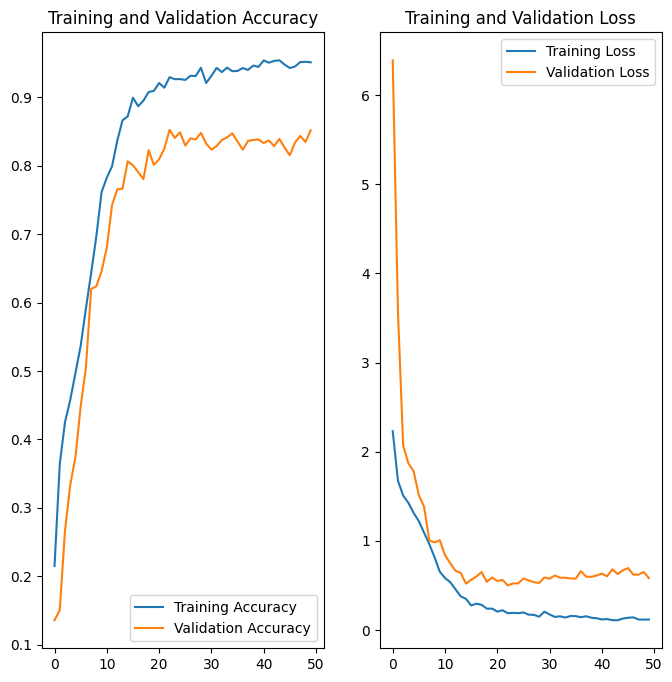

In [ ]:
epochs=50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



The overfitting issue is resolved.
As the training error increases validation error increases.
We are seeing high accuracy after handling class imbalance.